<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#" data-toc-modified-id="-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span></a></span></li><li><span><a href="#" data-toc-modified-id="-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span></a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Решающее-дерево" data-toc-modified-id="Решающее-дерево-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Решающее дерево</a></span></li><li><span><a href="#Модель-с-градиентным-бустингом-с-использованием-библиотеки-lightgbm" data-toc-modified-id="Модель-с-градиентным-бустингом-с-использованием-библиотеки-lightgbm-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Модель с градиентным бустингом с использованием библиотеки lightgbm</a></span></li><li><span><a href="#Модель-с-градиентным-бустингом-с-использованием-библиотеки-Catboost" data-toc-modified-id="Модель-с-градиентным-бустингом-с-использованием-библиотеки-Catboost-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span>Модель с градиентным бустингом с использованием библиотеки Catboost</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Bvt.ncz исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час.

Необходимо получить значение метрики *RMSE* меньше 48.


## Подготовка

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from lightgbm import LGBMModel
import lightgbm
from statsmodels.tsa.seasonal import seasonal_decompose
import torch
import transformers
from tqdm import notebook
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])

In [3]:
display(data)

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
...,...
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27


In [4]:
data = data.resample('1H').sum()

In [5]:
display(data)

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
...,...
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159


In [6]:
data.describe()

,num_orders
count,4416.000000
mean,84.422781
std,45.023853
min,0.000000
25%,54.000000
50%,78.000000
75%,107.000000
max,462.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
num_orders    4416 non-null int64
dtypes: int64(1)
memory usage: 69.0 KB


In [8]:
data = data.fillna(0)

In [9]:
print(data)

                     num_orders
datetime                       
2018-03-01 00:00:00         124
2018-03-01 01:00:00          85
2018-03-01 02:00:00          71
2018-03-01 03:00:00          66
2018-03-01 04:00:00          43
...                         ...
2018-08-31 19:00:00         136
2018-08-31 20:00:00         154
2018-08-31 21:00:00         159
2018-08-31 22:00:00         223
2018-08-31 23:00:00         205

[4416 rows x 1 columns]


### Вывод
Представленные данные были изучены. Пропущенные значения заменены 0.

## Анализ

In [10]:
decomposed = seasonal_decompose(data) 

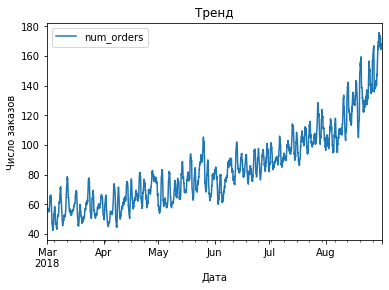

In [11]:
decomposed.trend.plot(ax=plt.gca())
plt.title('Тренд')
plt.xlabel('Дата')
plt.ylabel('Число заказов')
plt.show()

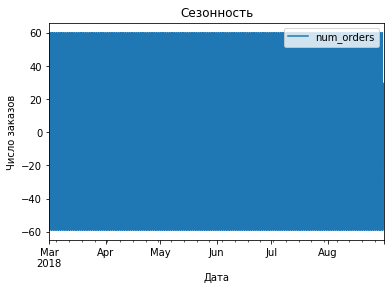

In [12]:
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Сезонность')
plt.xlabel('Дата')
plt.ylabel('Число заказов')
plt.show()

### Вывод
По всему периоду виден тренд, но сезонности не наблюдается, рассмотрю более короткий период.

In [13]:
data_2 = data['2018-03-01':'2018-03-07']

In [14]:
data_3 = data['2018-06-01':'2018-06-02']

In [15]:
decomposed = seasonal_decompose(data_2)

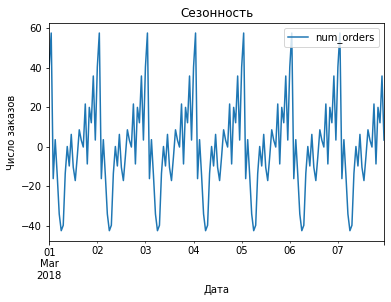

In [16]:
decomposed.seasonal.plot(ax=plt.gca()) 
plt.title('Сезонность')
plt.xlabel('Дата')
plt.ylabel('Число заказов')
plt.show()

In [17]:
decomposed = seasonal_decompose(data_3) 

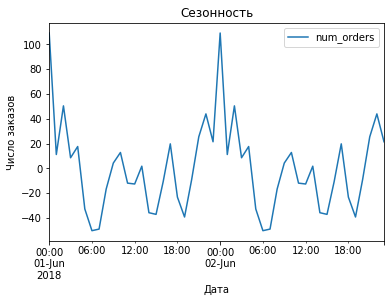

In [18]:
decomposed.seasonal.plot(ax=plt.gca()) 
plt.title('Сезонность')
plt.xlabel('Дата')
plt.ylabel('Число заказов')
plt.show()

### Вывод
По полученным данным виден тренд на постепенное повышение числа заказов со временем на всем периоде измерений. Заметна сезонность в течение дня. Утром мало заказов, в течение дня видна некоторая стабильност в количестве и к полуночи число заказов резко возрастает.

## Обучение

In [19]:
def make_features(data, max_lag, rolling_mean_size):
    data['hour'] = data.index.hour
    data['dayofweek'] = data.index.dayofweek
    for lag in range(1, max_lag+1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()

### 
Добавляем дополнительные столбц для лучшей работы модели.

In [20]:
make_features(data, 24, 48)

In [21]:
print(data)

                     num_orders  hour  dayofweek  lag_1  lag_2  lag_3  lag_4  \
datetime                                                                       
2018-03-01 00:00:00         124     0          3    NaN    NaN    NaN    NaN   
2018-03-01 01:00:00          85     1          3  124.0    NaN    NaN    NaN   
2018-03-01 02:00:00          71     2          3   85.0  124.0    NaN    NaN   
2018-03-01 03:00:00          66     3          3   71.0   85.0  124.0    NaN   
2018-03-01 04:00:00          43     4          3   66.0   71.0   85.0  124.0   
...                         ...   ...        ...    ...    ...    ...    ...   
2018-08-31 19:00:00         136    19          4  207.0  217.0  197.0  116.0   
2018-08-31 20:00:00         154    20          4  136.0  207.0  217.0  197.0   
2018-08-31 21:00:00         159    21          4  154.0  136.0  207.0  217.0   
2018-08-31 22:00:00         223    22          4  159.0  154.0  136.0  207.0   
2018-08-31 23:00:00         205    23   

### 
Проводим масштабирование признаков

In [24]:
a, test = train_test_split(data, shuffle=False, test_size=0.1, random_state=12345)
train, valid = train_test_split(a, shuffle=False, test_size=1/9, random_state=12345)

In [25]:
train = train.dropna()

In [26]:
print(train.index.min(), train.index.max())
print(valid.index.min(), valid.index.max())
print(test.index.min(), test.index.max())

2018-03-03 00:00:00 2018-07-26 03:00:00
2018-07-26 04:00:00 2018-08-13 13:00:00
2018-08-13 14:00:00 2018-08-31 23:00:00


In [27]:
print(train.shape)
print(valid.shape)
print(test.shape)

(3484, 28)
(442, 28)
(442, 28)


In [28]:
features_train = train.drop('num_orders', axis = 1)
target_train = train['num_orders']
features_valid = valid.drop('num_orders', axis = 1)
target_valid = valid['num_orders']
features_test = test.drop('num_orders', axis = 1)
target_test = test['num_orders']

#### Линейная регрессия

In [29]:
model = LinearRegression(normalize = False)
model.fit(features_train, target_train)
predictions_valid = model.predict(features_valid)
rmse = mean_squared_error(target_valid, predictions_valid)**0.5
print(rmse)

34.261607258397135


#### Случайный лес

In [30]:
best_model = None
best_result = 2500
best_est = 0
for est in range(1, 100, 10):
    model = RandomForestRegressor(random_state=12345, n_estimators=est) 
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result = mean_squared_error(target_valid, predictions_valid)**0.5
    if result < best_result:
        best_model = model
        best_result = result
        best_est = est
print('RMSE наилучшей модели на валидационной выборке:', best_result)
print('Значение параметра n_estimators для модели с лучшим RMSE:', best_est)

RMSE наилучшей модели на валидационной выборке: 31.97545887987871
Значение параметра n_estimators для модели с лучшим RMSE: 41


#### Решающее дерево

In [31]:
best_model = None
best_result = 2500
best_depth = 0
for depth in range(1, 100):
    model = DecisionTreeRegressor(random_state=12345, max_depth = depth)
    model.fit(features_train, target_train) 
    predictions_valid = model.predict(features_valid)
    result = mean_squared_error(target_valid, predictions_valid)**0.5
    if result < best_result:
        best_model = model
        best_result = result
        best_depth = depth
print('RMSE наилучшей модели на валидационной выборке:', best_result)
print('Значение параметра max_depth для модели с лучшей RMSE:', best_depth)

RMSE наилучшей модели на валидационной выборке: 36.6982215609876
Значение параметра max_depth для модели с лучшей RMSE: 7


#### Модель с градиентным бустингом с использованием библиотеки lightgbm

In [32]:
model = LGBMModel(objective="regression", n_estimators=100, learning_rate = 0.1)
model.fit(features_train, target_train, eval_set=[(features_valid, target_valid)], eval_metric = 'rmse', verbose=10) 
predictions_valid = model.predict(features_valid)
rmse = mean_squared_error(target_valid, predictions_valid)**0.5
print(rmse)

[10]	valid_0's rmse: 40.6839	valid_0's l2: 1655.18
[20]	valid_0's rmse: 35.1938	valid_0's l2: 1238.6
[30]	valid_0's rmse: 32.9976	valid_0's l2: 1088.84
[40]	valid_0's rmse: 32.1707	valid_0's l2: 1034.95
[50]	valid_0's rmse: 31.7572	valid_0's l2: 1008.52
[60]	valid_0's rmse: 31.635	valid_0's l2: 1000.77
[70]	valid_0's rmse: 31.4596	valid_0's l2: 989.706
[80]	valid_0's rmse: 31.5105	valid_0's l2: 992.915
[90]	valid_0's rmse: 31.4406	valid_0's l2: 988.51
[100]	valid_0's rmse: 31.4708	valid_0's l2: 990.409
31.4707615811655


#### Модель с градиентным бустингом с использованием библиотеки Catboost

In [33]:
model = CatBoostRegressor(loss_function="RMSE", iterations=200, learning_rate = 0.5) 
model.fit(features_train, target_train, verbose=50)
predictions_valid = model.predict(features_valid)
rmse = mean_squared_error(target_valid, predictions_valid)**0.5
print(rmse)

0:	learn: 28.9923981	total: 50.5ms	remaining: 10.1s
50:	learn: 14.6090133	total: 1.4s	remaining: 4.09s
100:	learn: 10.3655681	total: 2.87s	remaining: 2.81s
150:	learn: 7.9708348	total: 4.25s	remaining: 1.38s
199:	learn: 5.9218434	total: 5.63s	remaining: 0us
32.73289972432464


### Вывод
При облучении различных моделей видим, что параметр RMSE у них относительно похож и составляет примерно 35, что ниже контрольного значения, проведем тестирование всех предложенных моделей. 

## Тестирование

In [34]:
def plot(target_test, predictions_test):
    df_1 = pd.DataFrame(data = target_test)
    df = pd.DataFrame(data = predictions_test, index = df_1.index)
    df = df.join(df_1)['2018-08-14':'2018-08-21']
    df_2 = df['2018-08-14':'2018-08-15']
    df.plot()
    plt.title('Заказы')
    plt.xlabel('Дата')
    plt.ylabel('Число заказов')
    plt.show()
    df_2.plot()
    plt.title('Заказы')
    plt.xlabel('Дата')
    plt.ylabel('Число заказов')
    plt.show()

In [35]:
model = CatBoostRegressor(loss_function="RMSE", iterations=500, learning_rate = 0.05) 
model.fit(features_train, target_train, verbose=100)
predictions_test = model.predict(features_test)
rmse = mean_squared_error(target_test, predictions_test)**0.5
print('RMSE модели', rmse)

0:	learn: 34.9441482	total: 3.58ms	remaining: 1.79s
100:	learn: 20.2327027	total: 2.93s	remaining: 11.6s
200:	learn: 18.2590519	total: 5.88s	remaining: 8.75s
300:	learn: 16.5155953	total: 8.65s	remaining: 5.72s
400:	learn: 15.2440627	total: 11.5s	remaining: 2.84s
499:	learn: 14.1553472	total: 14.4s	remaining: 0us
RMSE модели 52.114804370775296


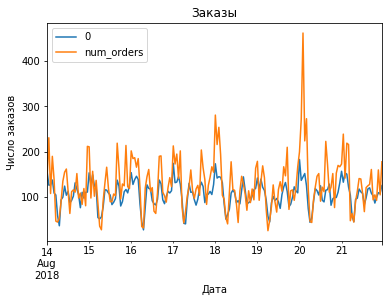

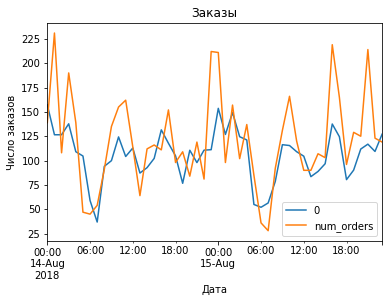

In [36]:
plot(target_test, predictions_test)

In [37]:
model = LGBMModel(objective="regression", n_estimators=80, learning_rate = 0.4)
model.fit(features_train, target_train, eval_set=[(features_test, target_test)], eval_metric = 'rmse', verbose=10) 
predictions_valid = model.predict(features_test)

[10]	valid_0's rmse: 49.7042	valid_0's l2: 2470.51
[20]	valid_0's rmse: 52.4252	valid_0's l2: 2748.4
[30]	valid_0's rmse: 51.7642	valid_0's l2: 2679.54
[40]	valid_0's rmse: 52.5965	valid_0's l2: 2766.39
[50]	valid_0's rmse: 53.5249	valid_0's l2: 2864.92
[60]	valid_0's rmse: 53.1289	valid_0's l2: 2822.68
[70]	valid_0's rmse: 53.7249	valid_0's l2: 2886.37
[80]	valid_0's rmse: 54.0824	valid_0's l2: 2924.91


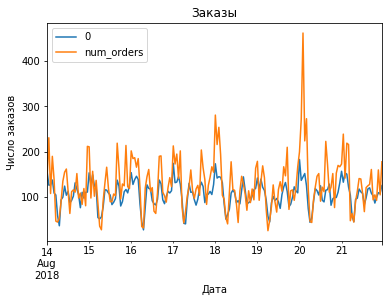

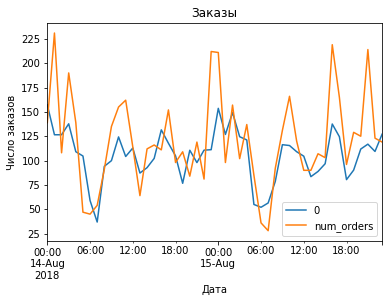

In [38]:
plot(target_test, predictions_test)

In [39]:
model = DecisionTreeRegressor(random_state=12345, max_depth = 5)
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)
rmse = mean_squared_error(target_test, predictions_test)**0.5
print('RMSE модели', rmse)

RMSE модели 58.296227358471704


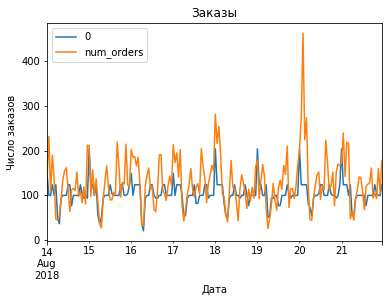

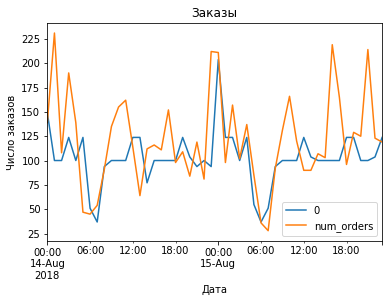

In [40]:
plot(target_test, predictions_test)

In [41]:
model = RandomForestRegressor(random_state=12345, n_estimators=100)
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)
rmse = mean_squared_error(target_test, predictions_test)**0.5
print('RMSE модели', rmse)

RMSE модели 50.12676700262791


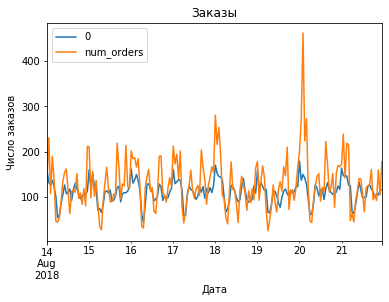

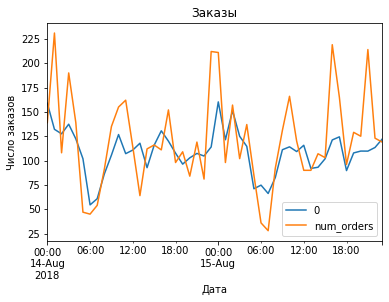

In [42]:
plot(target_test, predictions_test)

In [43]:
model = LinearRegression()
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)
rmse = mean_squared_error(target_test, predictions_test)**0.5
print('RMSE модели', rmse)

RMSE модели 45.49542628037722


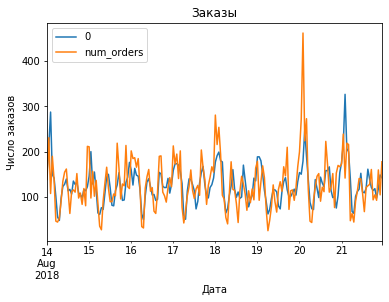

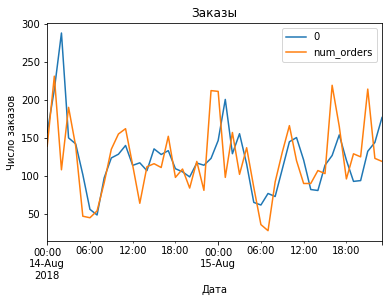

In [44]:
plot(target_test, predictions_test)

### Вывод
При работе с тестовыми данными видно резкое ухудшение качества моделей, по сравнению с валидационной выборкой. RMSE модели линейной регрессии меньше требуемого значения в 48, следовательно можно сделать вывод об успешном выполнении задачи. При рассмотрении графиков сравнения предсказанного и точного результатов можно заметить, что в моделях основанных на деревьях решений, разброс значений меньше чем в фактической выборке, т.е. различные выбросы оказывают более сильное влияние на итоговую точность, в модели линейной регрессии, разброс значений существует, но частично не в тех местах.

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Данные загружены и подготовлены
- [x]  Данные проанализированы
- [x]  Модель обучена, гиперпараметры подобраны
- [x]  Качество моделей проверено, выводы сделаны
- [x]  Значение *RMSE* на тестовой выборке не больше 48